In [3]:
import pandas as pd
import numpy as np
from montecarlo import die
from montecarlo import game
from montecarlo import analyzer

### Scenario 1

<AxesSubplot:xlabel='Type'>

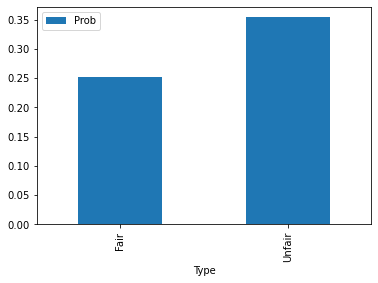

In [4]:
### Create coins
fair_coin = die(['H', 'T'])
unfair_coin = die(['H', 'T'])
unfair_coin.changew('H',5)

### Create dices for games
fair_dices = [fair_coin, fair_coin, fair_coin]
unfair_dices =[fair_coin, unfair_coin, unfair_coin]

### Run fair game
fair_game = game(fair_dices)
fair_game.play(1000)

### Run unfair game
unfair_game = game(unfair_dices)
unfair_game.play(1000)

### Run analyzer for both
fair_jackpots = analyzer(fair_game).jackpot()
unfair_jackpots = analyzer(unfair_game).jackpot()

### Compute relative frequency
rel_fair = fair_jackpots/1000
rel_unfair = unfair_jackpots/1000
df = pd.DataFrame(['Fair','Unfair'],[rel_fair,rel_unfair]).reset_index(level = 0)
df.columns = ['Prob', 'Type']
df.plot.bar(x = 'Type', y = 'Prob')

### Scenario 2

<AxesSubplot:xlabel='Type'>

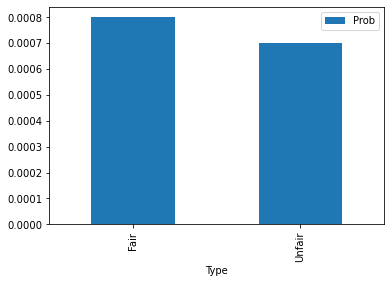

In [5]:
### Create dies
fair_die = die([1,2,3,4,5,6])
unfair_die1 = die([1,2,3,4,5,6])
unfair_die1.changew(6,5)
unfair_die2 = die([1,2,3,4,5,6])
unfair_die2.changew(1,5)

### Run fair game
fair_game_dices = [fair_die, fair_die, fair_die, fair_die, fair_die]
fair_game = game(fair_game_dices)
fair_game.play(10000)

### Run unfair game
unfair_game_dices = [unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die]
unfair_game = game(unfair_game_dices)
unfair_game.play(10000)

### Run analyzer for both
fair_jackpots = analyzer(fair_game).jackpot()
unfair_jackpots = analyzer(unfair_game).jackpot()

rel_fair = fair_jackpots/10000
rel_unfair = unfair_jackpots/10000
df = pd.DataFrame(['Fair','Unfair'],[rel_fair,rel_unfair]).reset_index(level = 0)
df.columns = ['Prob', 'Type']
df.plot.bar(x = 'Type', y = 'Prob')

<AxesSubplot:xlabel='Combo'>

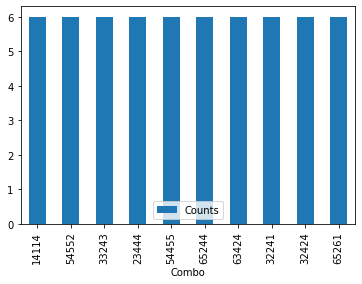

In [6]:
### Top 10 for fair game
top_10_fair = pd.DataFrame(analyzer(fair_game).combo().head(10))
top_10_fair.reset_index(inplace = True)
top_10_fair['Combo'] = top_10_fair.iloc[:,0].map(str) + top_10_fair.iloc[:,1].map(str) + top_10_fair.iloc[:,2].map(str) + top_10_fair.iloc[:,3].map(str) + top_10_fair.iloc[:,4].map(str)
top_10_fair.plot.bar(x = 'Combo', y = 'Counts')

<AxesSubplot:xlabel='Combo'>

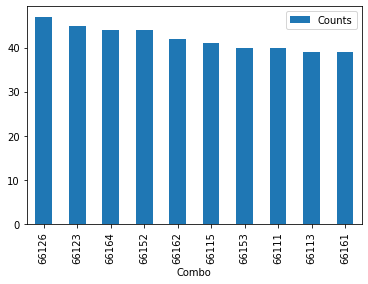

In [7]:
### Top 10 for unfair game
top_10_unfair = pd.DataFrame(analyzer(unfair_game).combo().head(10))
top_10_unfair.reset_index(inplace = True)
top_10_unfair['Combo'] = top_10_unfair.iloc[:,0].map(str) + top_10_unfair.iloc[:,1].map(str) + top_10_unfair.iloc[:,2].map(str) + top_10_unfair.iloc[:,3].map(str) + top_10_unfair.iloc[:,4].map(str)
top_10_unfair.plot.bar(x = 'Combo', y = 'Counts')

### Scenario 3

In [8]:
### Create letters list
letters = []
for i in range(ord('A'), ord('Z')+1):
    letters.append(chr(i))
    
### Create die letters
die_letters = die(letters)

### Get weights for each letter
weights = pd.DataFrame([['A',8.4966],
['B',2.0720],
['C',4.5388],
['D',3.3844],
['E',11.1607],
['F',1.8121],
['G',2.4705],
['H',3.0034],
['I',7.5448],
['J',0.1965],
['K',1.1016],
['L',5.4893],
['M',3.0129],
['N',6.6544],
['O',7.1635],
['P',3.1671],
['Q',0.1962],
['R',7.5809],
['S',5.7351],
['T',6.9509],
['U',3.6308],
['V',1.0074],
['W',1.2899],
['X',0.2902],
['Y',1.7779],
['Z',0.2722]])
weights.columns = ['Letter', 'Weight']

### Change weights
for i in range(0,25):
    die_letters.changew(weights.Letter[i],float(weights.Weight[i]))

### Create dice and run game
die_combination = [die_letters, die_letters, die_letters, die_letters, die_letters]
game_letters = game(die_combination)
game_letters.play(1000)

### Check combos
analyzer(game_letters).combo().head(60)

Counts
0 1 2 3 4        
A A A N T       1
O T H H E       1
  P T T I       1
  Q Z T N       1
  R K T L       1
    N E A       1
    R L C       1
        E       1
    V E E       1
  S D O E       1
    L A F       1
    S A F       1
  T D S T       1
    E A E       1
      I I       1
    I O O       1
P D A E A       1
O T N P C       1
  U N L G       1
    T F G       1
  V E L W       1
  W A R E       1
  Y A L N       1
    E A L       1
  Z C S N       1
    M C O       1
P A M H U       1
    O E D       1
    T E I       1
      F G       1
O P T A L       1
    O X I       1
    N I L       1
    E M E       1
  G L T R       1
  H I T Y       1
  I L M R       1
    O O G       1
    R A N       1
  K T F A       1
  L A L R       1
    E U O       1
    N O B       1
    T T H       1
    Z G O       1
  M F E E       1
    P R D       1
    R T A       1
  N C B C       1
    E P G       1
      V O       1
    M E B       1
    O G R       1
    T R R       1
    Z O R       1
  O C H N       1
      T V       1
    I S O       1
    L M V       1
    M E I       1

It looks like there are very few english words, in the top 60 I don't see any, so my guess would be that less than 1/60 of the permutations are words.